In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
df = pd.read_hdf('summary.h5')
new_index = [name.replace('_10yrs', '') for name in df.index]
df.index=new_index


In [4]:
df

metric,fOArea fO HealpixSlicer,fOArea/benchmark fO HealpixSlicer,fONv MedianNvis fO HealpixSlicer,fONv MinNvis fO HealpixSlicer,fONv/benchmark MedianNvis fO HealpixSlicer,fONv/benchmark MinNvis fO HealpixSlicer,fOArea_750 fO HealpixSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Area better than 11.5 mas uncertainty Parallax Uncert @ 22.4 HealpixSlicer,95th Percentile Parallax Uncert Parallax Uncert @ 22.4 HealpixSlicer,...,"Counts_ToO, 89_t8","Counts_ToO, 95_t0","Counts_ToO, 95_t1","Counts_ToO, 95_t2","Counts_ToO, 95_t4","Counts_ToO, 96_t0","Counts_ToO, 96_t1","Counts_ToO, 96_t2","Counts_ToO, 96_t4","Counts_ToO, 96_t8"
baseline_v2.0,12893.228978,0.716290,839.0,787.0,1.016970,0.953939,18620.568813,2.423048,27299.704398,10.034633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
too_rate10_v2.0,12710.262963,0.706126,838.0,786.0,1.015758,0.952727,18607.979408,2.387778,27256.061128,10.096856,...,110.0,60.0,80.0,100.0,100.0,66.0,88.0,110.0,110.0,110.0
too_rate50_v2.0,11628.413454,0.646023,834.0,782.0,1.010909,0.947879,18600.425765,2.410553,27300.543691,10.179046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax best 18k',
            'best18k properMotion  HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': '5-10d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'CumulativeCompleteness H <= 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO discov\nH<=16',
            'CumulativeCompleteness H <= 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights detection loss MoObjSlicer': 'NEO discov\nH<=22',
            'CumulativeCompleteness H <= 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights detection loss MoObjSlicer': 'TNO discov\nH<=6',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_zlim  HealpixSlicer': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits gri band non-DD HealpixSlicer': 'WL Nvis i-band',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'KNe Presto S',
            'Total detected XRBPopMetric__early_detect  UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7  HealpixSlicer': 'Brown Dwarf Vol',}
invert_cols = ['parallax best 18k', 'proper motion best 18k']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]

mag_name_dict = {}
for filtername in 'ugrizy':
    mag_name_dict['Median CoaddM5 %s HealpixSlicer' % filtername] = filtername

mag_data = pd.DataFrame()
for key in mag_name_dict:
    mag_data[mag_name_dict[key]] = df[key]


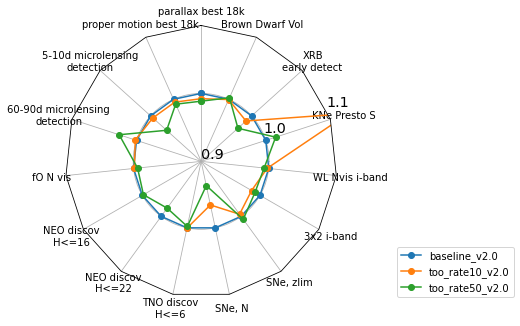

In [14]:
runs = [run for run in df.index]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')

fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(1.65, 0))
fig.savefig('baseline2_radar.pdf', bbox_inches="tight")